<a href="https://colab.research.google.com/github/amirabehery/AMIT/blob/main/Fashion_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D
import tensorflow as tf
from keras.utils import to_categorical

In [2]:
bpath = '/content/drive/MyDrive/Computer_Vision/after histo.jpg'
cpath = '/content/drive/MyDrive/Computer_Vision/desert.jpg'

# read images by plt and change color

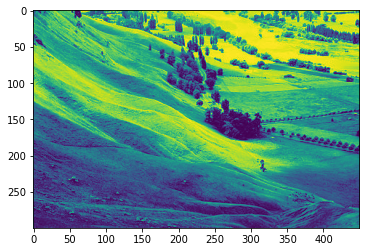

In [3]:
bimg = plt.imread(bpath)
plt.imshow(bimg)
plt.show()

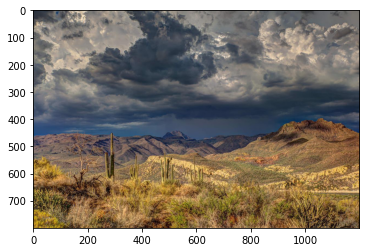

In [4]:
cimg = plt.imread(cpath)
plt.imshow(cimg)
plt.show()

In [5]:
bimg.shape, cimg.shape

((300, 450), (800, 1200, 3))

In [6]:
cimg[400,400]

array([47, 63, 88], dtype=uint8)

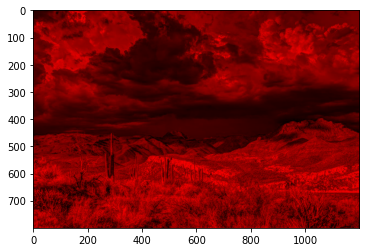

In [7]:
# red image and remove green and blue
red_img = plt.imread(cpath)
red_img[:,:,1] = 0
red_img[:,:,2] = 0
plt.imshow(red_img)
plt.show()

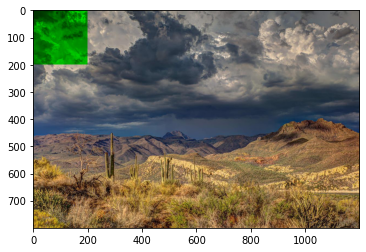

In [8]:
# remove part from image and let it green
green_img = plt.imread(cpath)
green_img[:200,:200,0] = 0
green_img[:200,:200,2] = 0
plt.imshow(green_img)
plt.show()

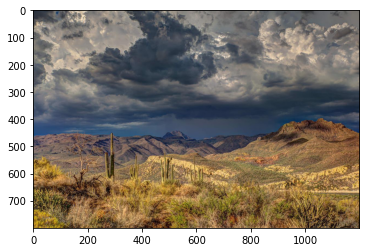

In [9]:
plt.imshow(cimg)
plt.show()

# encoding Categories

In [10]:
# using one hot encoding to represent images
labels = ['shirt','dress','shoe']
n_categories = len(labels)
categories = np.array(labels)
one_labels = np.zeros([n_categories, n_categories])
for ii in range(n_categories):
  jj = np.where(categories == labels[ii])
  one_labels[ii, jj] = 1

print(one_labels)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


# Convolution 

In [11]:
data = tf.keras.datasets.fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [12]:
(x_train, y_train), (x_test, y_test) = data
# x_train = np.array(x_train)
# y_train = np.array(y_train)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

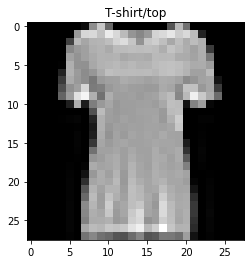

In [13]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def showRandomImage(x,y, labels, number):
  image = x[number]
  fig = plt.figure
  plt.imshow(image, cmap='gray')
  plt.title(labels[y[number]])
  plt.show()

showRandomImage(x_train,y_train, classes, 10)

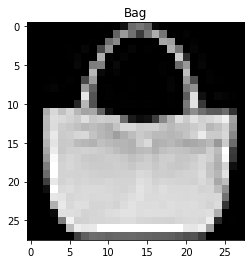

In [14]:
showRandomImage(x_train,y_train, classes, 100)

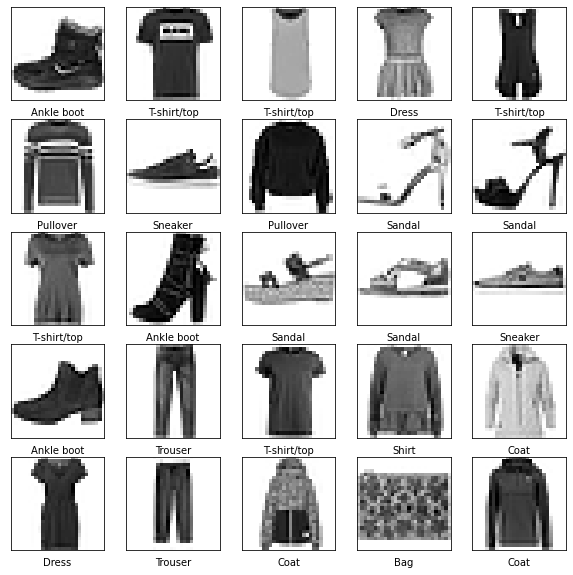

In [15]:
def showManyImages(x, y, labels, count):
  plt.figure(figsize=(10,10))
  for i in range(25):
      plt.subplot(count//2,count//2,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(x[i], cmap=plt.cm.binary)
      plt.xlabel(labels[y[i]])
  plt.show()

showManyImages(x_train, y_train, classes, 10)

In [16]:
img_rows = x_train.shape[1]
img_cols = x_train.shape[2]

In [17]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [18]:
# convert from integers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# normalize to range 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [19]:
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  # compile model
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

model = define_model()

In [20]:
model.fit(x_train, y_train, validation_split=0.2, epochs=3, batch_size=10)

Epoch 1/3
4800/4800 [==============================] - 30s 4ms/step - loss: 0.3777 - accuracy: 0.8654 - val_loss: 0.3260 - val_accuracy: 0.8839
Epoch 2/3
4800/4800 [==============================] - 21s 4ms/step - loss: 0.2477 - accuracy: 0.9084 - val_loss: 0.2771 - val_accuracy: 0.9016
Epoch 3/3
4800/4800 [==============================] - 19s 4ms/step - loss: 0.1865 - accuracy: 0.9308 - val_loss: 0.2974 - val_accuracy: 0.8992
